Menyimpan token autentikasi untuk mengakses Twitter API melalui tool tweet-harvest.

In [2]:

#@title Twitter Auth Token

twitter_auth_token = 'e95d73bd6949da13c44da2b8acc3a6181584bef2'

Mengaktifkan custom widget manager di Google Colab untuk mencegah sesi terputus saat proses panjang (seperti training model).

In [3]:
# Mencegah Colab disconnect
from google.colab import output
output.enable_custom_widget_manager()



*   Menginstal library Python (pandas)

*   Menginstal Node.js versi 20 (diperlukan karena tweet-harvest dibangun menggunakan Node.js)




In [4]:
# Import required Python package
!pip install pandas

# Install Node.js (because tweet-harvest built using Node.js)
!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

!sudo apt-get update
!sudo apt-get install nodejs -y

!node -v

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cli.github.com/packages stable InRelease [3,917 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,225 kB]
Get:5 https://cli.github.com/packages stable/main amd64 Packages [345 B]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,287 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/

Menginstal Playwright (browser automation) yang digunakan oleh tweet-harvest untuk scraping tweet.

In [5]:
!pip install playwright
!playwright install-deps
!playwright install chromium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 MB 53.3 MB/s eta 0:00:00
Installing dependencies...
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://cli.github.com/packages stable InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 https://deb.nodesource.com/node_20.x nodistro InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured 

Mengumpulkan tweet dengan kriteria:

*   Kata kunci: "Deforestasi", "Hutan Gundul", "Menhut", "Mendagri"
*   Periode: 20 November - 20 Desember 2025
*   Bahasa: Indonesia (lang:id)
*   Jumlah maksimal: 1000 tweet
*   Tab: LATEST (tweet terbaru)

Output: File CSV tweets-data/penggundulanhutan.csv

In [6]:
filename = 'penggundulanhutan.csv'
search_keyword = '"Deforestasi", "Hutan Gundul", "Menhut", "Mendagri" since:2025-11-20 until:2025-12-20 lang:id'
limit = 1000

!npx -y tweet-harvest@2.6.1 -o "{filename}" -s "{search_keyword}" --tab "LATEST" -l {limit} --token {twitter_auth_token}

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏npm warn deprecated rimraf@3.0.2: Rimraf versions prior to v4 are no longer supported
⠋npm warn deprecated glob@7.2.3: Glob versions prior to v9 are no longer supported
⠋npm warn deprecated inflight@1.0.6: This module is not supported, and leaks memory. Do not use it. Check out lru-cache if you want a good and tested way to coalesce async requests by a key value, which is much more comprehensive and powerful.
⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙Tweet Harvest [v2.6.1]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.


Opening twitter search page...


Filling in keywords: Deforestasi, Hutan


-- Scrolling... (1)Created new directory: /content/tweets-data


Your tweets 

Membaca file CSV hasil scraping ke dalam Pandas DataFrame untuk analisis lebih lanjut.

In [9]:
import pandas as pd

file_path = f"tweets-data/{filename}"

df = pd.read_csv(file_path, delimiter=",")
display(df)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,2006584753143820437,Thu Jan 01 05:23:30 +0000 2026,0,@mangopassionFr_ bisa mbak ul konon dulu cerit...,2006597124897882454,NaN,mangopassionFr_,in,NaN,0,0,0,https://x.com/undefined/status/200659712489788...,2650518984,NaN
1,2006590820611240030,Thu Jan 01 04:58:26 +0000 2026,0,1️⃣ JENIS USAHA yang BERHUBUNGAN LANGSUNG deng...,2006590820611240030,NaN,NaN,in,NaN,1,0,0,https://x.com/undefined/status/200659082061124...,1383295518374121475,NaN
2,2005592127213068697,Thu Jan 01 04:37:20 +0000 2026,0,@__AnakKolong deforestasi legal sudah menjelas...,2006585508756083094,NaN,__AnakKolong,in,NaN,0,0,0,https://x.com/undefined/status/200658550875608...,899589151003000832,NaN
3,2006579858277626036,Thu Jan 01 04:14:53 +0000 2026,0,Deforestasi kan Penggundulan Hutan Bukan Penan...,2006579858277626036,https://pbs.twimg.com/ext_tw_video_thumb/20065...,NaN,in,NaN,1,0,0,https://x.com/undefined/status/200657985827762...,1383295518374121475,NaN
4,2006258493364527165,Thu Jan 01 03:47:26 +0000 2026,0,@ekowboy2 ini orang GK ada otak . Ada efek rum...,2006572948942156135,NaN,ekowboy2,in,NaN,0,0,0,https://x.com/undefined/status/200657294894215...,319705197,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,2002908383532515438,Mon Dec 22 01:20:14 +0000 2025,7,https://t.co/A2HwSldj0N https://t.co/sTnkWAaM7...,2002912027300561155,NaN,cajranya,zxx,NaN,0,7,0,https://x.com/undefined/status/200291202730056...,3151848454,NaN
1015,2002908006196093124,Mon Dec 22 01:18:33 +0000 2025,3,https://t.co/NWwEPs0tW1 https://t.co/cZKGat1dg...,2002911603956883888,NaN,kemarikcn,zxx,NaN,0,7,1,https://x.com/undefined/status/200291160395688...,3126827646,NaN
1016,2002907613227528497,Mon Dec 22 01:16:27 +0000 2025,5,https://t.co/WvJP7LXn9h https://t.co/B0uCvuoaB...,2002911076070121700,NaN,peluafg,zxx,NaN,0,5,1,https://x.com/undefined/status/200291107607012...,3151401964,NaN
1017,2002907255105331663,Mon Dec 22 01:14:43 +0000 2025,2,https://t.co/0XH6Xzq7gl https://t.co/W3DqcgQng...,2002910641863156212,NaN,origdmi,zxx,NaN,0,5,0,https://x.com/undefined/status/200291064186315...,3147149457,NaN


Menampilkan total jumlah tweet yang berhasil dikumpulkan.

In [8]:

# Mengecek jumlah data yang didapatkan

num_tweets = len(df)
print(f"Jumlah tweet dalam dataframe adalah {num_tweets}.")

Jumlah tweet dalam dataframe adalah 1019.


Menampilkan metadata dataset secara terstruktur untuk dokumentasi.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

# Load dataset dari direktori Colab
file_path = '/content/tweets-data/penggundulanhutan.csv'
df = pd.read_csv(file_path)

print(f"Data berhasil dimuat: {len(df)} baris.")
df.head()

# DESKRIPSI DATASET

print("=" * 50)
print("DESKRIPSI DATASET")
print("=" * 50)
print(f"Sumber Data      : Twitter (X)")
print(f"Topik            : Deforestasi & Pengundulan Hutan")
print(f"Periode          : 20 Nov - 20 Des 2025")
print(f"Ukuran Dataset   : {len(df)} tweets")
print(f"Jumlah Kolom     : {len(df.columns)}")
print(f"Kolom yang ada   : {list(df.columns)}")
print("=" * 50)

Data berhasil dimuat: 1019 baris.
DESKRIPSI DATASET
Sumber Data      : Twitter (X)
Topik            : Deforestasi & Pengundulan Hutan
Periode          : 20 Nov - 20 Des 2025
Ukuran Dataset   : 1019 tweets
Jumlah Kolom     : 15
Kolom yang ada   : ['conversation_id_str', 'created_at', 'favorite_count', 'full_text', 'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location', 'quote_count', 'reply_count', 'retweet_count', 'tweet_url', 'user_id_str', 'username']


Fungsi Preprocessing:
*   Konversi ke lowercase
*   Hapus URL, mention (@), dan hashtag (#)
*   Hapus karakter non-alfabet (angka, simbol)
*   Normalisasi spasi


Filter Data:

Menghapus tweet dengan kurang dari 5 kata (biasanya spam/bot)

Stopwords Indonesia:

Daftar kata-kata umum yang akan diabaikan dalam WordCloud (yang, dan, di, ke, dari, ini, itu, dll.)

WordCloud:

Visualisasi kata-kata paling dominan dalam dataset dengan colormap OrRd (orange-red).

Data awal: 1019 tweets
Pembersihan teks selesai.
Data setelah filter (min 5 kata): 353 tweets


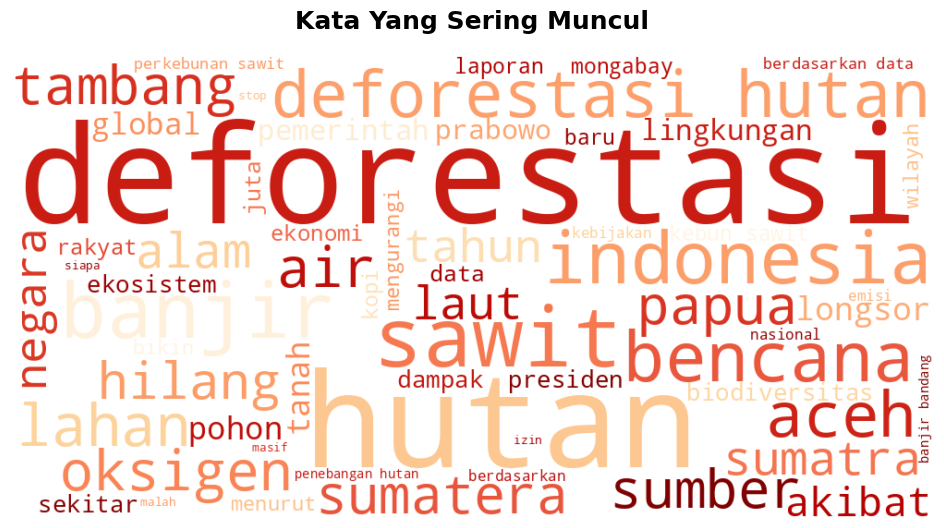

In [11]:

# CELL 8: PREPROCESSING + FILTER DATA
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load data
file_path = '/content/tweets-data/penggundulanhutan.csv'
df = pd.read_csv(file_path)

print(f"Data awal: {len(df)} tweets")


# PREPROCESSING: Membersihkan teks

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|@\w+|#\w+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['cleaned_text'] = df['full_text'].apply(clean_text)
print("Pembersihan teks selesai.")


# FILTER: Hapus tweet yang terlalu pendek atau kosong

df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))

# Hapus tweet dengan kurang dari 5 kata (biasanya hanya URL/spam)
df = df[df['word_count'] >= 5].copy()

print(f"Data setelah filter (min 5 kata): {len(df)} tweets")


# STOPWORDS untuk WordCloud

indo_stopwords = {
    'yang', 'dan', 'di', 'ke', 'dari', 'ini', 'itu', 'dengan', 'ada', 'adalah',
    'untuk', 'pada', 'saya', 'kita', 'ia', 'bahwa', 'tidak', 'tapi', 'namun',
    'juga', 'karena', 'sudah', 'telah', 'saat', 'hanya', 'bisa', 'tak', 'jadi',
    'oleh', 'saja', 'dalam', 'amp', 'ingin', 'buat', 'kalau', 'paling', 'agak',
    'lah', 'kok', 'aja', 'ya', 'ni', 'sih', 'yg', 'apa', 'masih', 'terus', 'utk', 'ga', 'lagi', 'atau', 'akan', 'terus', 'lebih',
    'gak', 'bukan', 'ha', 'harus', 'dgn', 'sebagai', 'sama', 'menjadi', 'terjadi', 'lagi', 'harus', 'banyak', 'atau',
    'sama', 'memang', 'dia', 'krn', 'cuma', 'besar', 'setuju', 'punya', 'jangan', 'mau', 'secara', 'hingga', 'sehingga', 'setelah',
    'seperti', 'tetap', 'jika', 'terkait', 'secara', 'des', 'punya', 'benar', 'tdk', 'tanpa', 'semua', 'sering', 'termasuk',
    'kan', 'orang', 'mereka', 'soal', 'utama'
}


# WORDCLOUD: Visualisasi kata-kata dominan

plt.figure(figsize=(12, 6))
all_words = ' '.join(df['cleaned_text'])
wordcloud = WordCloud(width=1000, height=500,
                      background_color='white',
                      stopwords=indo_stopwords,
                      colormap='OrRd',
                      max_words=60).generate(all_words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Kata Yang Sering Muncul', fontsize=18, pad=20, fontweight='bold')
plt.show()

Melabel sentimen tweet menggunakan regex pattern matching yang memahami konteks kalimat.

Kategori Pola Positif:
*   Keberhasilan menekan deforestasi

*   Reboisasi dan restorasi
*   Konservasi dan perlindungan
*   Hasil positif lingkungan
*   Kebijakan pro-lingkungan

Kategori Pola Negatif:
*   Kerusakan hutan aktif
*   Penebangan ilegal
*   Bencana akibat deforestasi
*   Kebakaran hutan
*   Kritik kebijakan

Scoring System:

*   Menghitung jumlah pola positif dan negatif yang cocok

*   Menentukan label berdasarkan dominasi skor
*   Menghitung confidence score (0-1)

Output:


*   label: Positif, Negatif, Netral
*   confidence: Tingkat keyakinan prediksi
*   neg_keywords: Kata kunci negatif yang terdeteksi
*   pos_keywords: Kata kunci positif yang terdeteksi

In [ ]:

# IMPROVED LABELING DENGAN CONTEXT-AWARE PATTERN MATCHING


import re

def label_with_context(text):
    """
    Labeling dengan pattern matching yang memahami konteks kalimat,
    bukan hanya menghitung keyword.
    """
    text = str(text).lower()


    # POLA POSITIF - Konteks solusi, keberhasilan, dukungan

    positive_patterns = [
        # Keberhasilan menurunkan/menekan deforestasi
        r'deforestasi.{0,30}(turun|berkurang|ditekan|menurun|rendah|nol|berhenti)',
        r'(turun|berkurang|ditekan|menurun).{0,30}deforestasi',
        r'(nol|zero|tanpa|stop|anti).{0,10}deforestasi',
        r'(berhasil|sukses|mampu|bisa).{0,30}(tekan|kurangi|hentikan|cegah).{0,20}deforestasi',

        # Reboisasi dan restorasi
        r'(reboisasi|restorasi|penghijauan|penanaman pohon)',
        r'(tanam|menanam).{0,20}(pohon|bibit|hutan)',
        r'(pohon|hutan).{0,20}(ditanam|bertambah|pulih)',
        r'(juta|ribu|ribuan).{0,10}(pohon|bibit).{0,10}(ditanam|tanam)',

        # Konservasi dan perlindungan
        r'(konservasi|pelestarian|perlindungan).{0,20}hutan',
        r'(melindungi|menjaga|melestarikan|merawat).{0,20}hutan',
        r'(lindungi|jaga|selamatkan|lestarikan).{0,20}hutan',
        r'hutan.{0,20}(dilindungi|dijaga|dilestarikan|terjaga)',

        # Hasil positif lingkungan
        r'(emisi|karbon).{0,20}(turun|berkurang|menurun)',
        r'(hijau|lestari|asri).{0,20}(kembali|lagi|tetap)',
        r'hutan.{0,20}(pulih|membaik|hijau kembali)',
        r'(net gain|forest gain|penambahan hutan)',

        # Kebijakan positif
        r'(moratorium|larangan).{0,20}(deforestasi|penebangan|pembukaan lahan)',
        r'(kebijakan|program|komitmen).{0,20}(anti deforestasi|pro lingkungan|hijau)',

        # Ekspresi dukungan untuk lingkungan
        r'(setuju|dukung|mendukung).{0,30}(lindungi|jaga|lestarikan|konservasi).{0,20}hutan',
        r'(prioritas|utama|penting).{0,20}(melindungi|menjaga|konservasi).{0,20}hutan',

        # Sustainable/berkelanjutan
        r'(sawit|pertanian|industri).{0,20}(berkelanjutan|sustainable|ramah lingkungan)',
        r'(tanpa|bebas).{0,10}deforestasi',

        # Apresiasi dan pencapaian
        r'(bukti|contoh|teladan).{0,20}(nyata|baik|positif)',
        r'(apresiasi|bangga|senang).{0,30}(lingkungan|hutan|konservasi)',
    ]


    # POLA NEGATIF - Konteks masalah, kerusakan, kritik

    negative_patterns = [
        # Kerusakan hutan aktif
        r'hutan.{0,20}(rusak|hancur|hilang|habis|gundul|musnah|terbakar)',
        r'(rusak|hancur|hilang|habis|gundul).{0,20}hutan',
        r'(kerusakan|kehancuran|kehilangan).{0,20}hutan',
        r'deforestasi.{0,20}(parah|masif|besar|meningkat|meluas)',
        r'(laju|tingkat|angka).{0,10}deforestasi.{0,10}(tinggi|naik|meningkat)',

        # Penebangan ilegal
        r'(ilegal|liar|illegal).{0,20}(logging|penebangan|pembalakan)',
        r'(pembalakan|penebangan|pembabatan).{0,20}(liar|ilegal|masif)',
        r'(mafia|kartel|sindikat).{0,20}(hutan|kayu|logging)',

        # Bencana akibat deforestasi
        r'(banjir|longsor|kekeringan|bencana).{0,30}(akibat|karena|dampak|efek).{0,20}(deforestasi|penebangan|gundul)',
        r'(deforestasi|penebangan|hutan hilang).{0,30}(sebab|penyebab|akibatkan).{0,20}(banjir|longsor|bencana)',
        r'(korban|mengungsi|evakuasi|meninggal).{0,30}(banjir|longsor|bencana)',

        # Kebakaran hutan
        r'(kebakaran|terbakar|api).{0,20}(hutan|lahan)',
        r'(hutan|lahan).{0,20}(terbakar|kebakaran|dilahap api)',
        r'(asap|kabut asap|polusi).{0,20}(kebakaran|hutan)',

        # Eksploitasi dan perusakan
        r'(eksploitasi|mengeruk|menguras|membabat).{0,20}(hutan|alam|sumber daya)',
        r'(sawit|tambang|perkebunan).{0,30}(rusak|hancur|habiskan).{0,20}hutan',
        r'hutan.{0,20}(dikorbankan|dihabiskan|dibabat).{0,20}(sawit|tambang|bisnis)',

        # Kritik kebijakan/pemerintah
        r'(pemerintah|rezim|penguasa).{0,30}(gagal|bobrok|korup).{0,20}(lingkungan|hutan)',
        r'(izin|konsesi|hgu).{0,30}(bermasalah|ilegal|kontroversial)',
        r'(korupsi|suap|kolusi).{0,30}(hutan|lingkungan|kehutanan)',

        # Dampak negatif
        r'(habitat|ekosistem|satwa).{0,20}(hilang|rusak|hancur|terancam)',
        r'(spesies|flora|fauna).{0,20}(punah|terancam|hilang)',
        r'(krisis|darurat|ancaman).{0,20}(lingkungan|iklim|ekologi)',

        # Ekspresi kemarahan/kritik
        r'(miris|tragis|memprihatinkan|mengerikan|parah).{0,30}(hutan|deforestasi|lingkungan)',
        r'(stop|hentikan|tolak).{0,20}(deforestasi|penebangan|perusakan)',
        r'(jangan|dilarang).{0,20}(rusak|tebang|bakar).{0,20}hutan',

        # Kegagalan dan masalah
        r'(gagal|tidak berhasil|sia-sia).{0,30}(lindungi|jaga|konservasi)',
        r'(masalah|problem|isu).{0,20}(deforestasi|lingkungan|hutan)',
    ]


    # SCORING DENGAN PATTERN MATCHING
    pos_score = 0
    neg_score = 0
    pos_matches = []
    neg_matches = []

    # Cek pola positif
    for pattern in positive_patterns:
        matches = re.findall(pattern, text)
        if matches:
            pos_score += len(matches)
            pos_matches.extend(matches if isinstance(matches[0], str) else [m[0] for m in matches])

    # Cek pola negatif
    for pattern in negative_patterns:
        matches = re.findall(pattern, text)
        if matches:
            neg_score += len(matches)
            neg_matches.extend(matches if isinstance(matches[0], str) else [m[0] for m in matches])


    # KEYWORD FALLBACK (jika tidak ada pattern yang cocok)

    if pos_score == 0 and neg_score == 0:
        # Gunakan keyword sederhana sebagai fallback
        simple_neg = ['rusak', 'hancur', 'banjir', 'longsor', 'ilegal', 'gagal', 'parah',
                      'korban', 'bencana', 'terbakar', 'gundul', 'habis', 'musnah']
        simple_pos = ['reboisasi', 'konservasi', 'lindungi', 'tanam pohon', 'lestari',
                      'berkelanjutan', 'berhasil', 'pulih', 'hijau']

        for word in simple_neg:
            if word in text:
                neg_score += 0.5
                neg_matches.append(word)

        for word in simple_pos:
            if word in text:
                pos_score += 0.5
                pos_matches.append(word)


    # TENTUKAN LABEL & CONFIDENCE

    total_score = pos_score + neg_score

    if total_score == 0:
        return 'Netral', 0.3, [], []

    # Hitung confidence berdasarkan dominasi
    if neg_score > pos_score:
        label = 'Negatif'
        confidence = neg_score / total_score

        if neg_score >= 2 and pos_score == 0:
            confidence = min(confidence + 0.2, 1.0)
    elif pos_score > neg_score:
        label = 'Positif'
        confidence = pos_score / total_score

        if pos_score >= 2 and neg_score == 0:
            confidence = min(confidence + 0.2, 1.0)
    else:
        label = 'Netral'
        confidence = 0.4

    # Kurangi confidence jika ada campuran yang kuat
    if neg_score > 0 and pos_score > 0:
        confidence *= 0.7

    return label, round(confidence, 2), neg_matches, pos_matches


# TERAPKAN LABELING
results = df['cleaned_text'].apply(label_with_context)

df['label'] = results.apply(lambda x: x[0])
df['confidence'] = results.apply(lambda x: x[1])
df['neg_keywords'] = results.apply(lambda x: x[2])
df['pos_keywords'] = results.apply(lambda x: x[3])


# ANALISIS HASIL
print("=" * 60)
print("HASIL LABELING DENGAN CONTEXT-AWARE PATTERN MATCHING")
print("=" * 60)

print("\n📊 DISTRIBUSI LABEL:")
print(df['label'].value_counts())
print(f"\nPersentase:")
print((df['label'].value_counts(normalize=True) * 100).round(1))

print("\n📈 DISTRIBUSI CONFIDENCE:")
print(f"  High (≥0.7)  : {len(df[df['confidence'] >= 0.7])} tweets")
print(f"  Medium (0.5-0.7): {len(df[(df['confidence'] >= 0.5) & (df['confidence'] < 0.7)])} tweets")
print(f"  Low (<0.5)   : {len(df[df['confidence'] < 0.5])} tweets")


# SAMPLE HASIL

print("\n" + "=" * 60)
print("SAMPLE HASIL LABELING")
print("=" * 60)

print("\n🟢 SAMPLE POSITIF:")
for idx, row in df[df['label'] == 'Positif'].head(5).iterrows():
    print(f"• [{row['confidence']}] {row['cleaned_text'][:100]}...")
    print(f"  Matched: {row['pos_keywords'][:3]}")
    print()

print("\n🔴 SAMPLE NEGATIF:")
for idx, row in df[df['label'] == 'Negatif'].head(5).iterrows():
    print(f"• [{row['confidence']}] {row['cleaned_text'][:100]}...")
    print(f"  Matched: {row['neg_keywords'][:3]}")
    print()

HASIL LABELING DENGAN CONFIDENCE SCORE

📊 DISTRIBUSI LABEL:
label
Negatif    185
Netral     103
Positif     55
Name: count, dtype: int64

Persentase:
label
Negatif    53.9
Netral     30.0
Positif    16.0
Name: proportion, dtype: float64

📈 DISTRIBUSI CONFIDENCE:
  High (≥0.7)  : 178 tweets
  Medium (0.5-0.7): 2 tweets
  Low (<0.5)   : 163 tweets




*   Memisahkan data berdasarkan confidence score

*   Tweet dengan confidence ≥ 0.7 dianggap "cukup yakin"
*   Tweet dengan confidence < 0.7 di-export untuk validasi manual



In [ ]:

# EXPORT UNTUK MANUAL REVIEW

# Pisah berdasarkan confidence
high_conf = df[df['confidence'] >= 0.7].copy()
low_conf = df[df['confidence'] < 0.7].copy()

print(f"\nHigh Confidence: {len(high_conf)} tweets (auto-accept)")
print(f"  Low Confidence: {len(low_conf)} tweets (PERLU REVIEW)")

# Export yang perlu direview
review_df = low_conf[['full_text', 'label', 'confidence', 'neg_keywords', 'pos_keywords']].copy()
review_df['label_corrected'] = review_df['label']  # Kolom untuk koreksi

review_df.to_csv('tweets_perlu_review.csv', index=False)
print(f"\n📁 File 'tweets_perlu_review.csv' sudah dibuat!")
print("   Buka di Excel/Google Sheets, koreksi kolom 'label_corrected'")


✅ High Confidence: 178 tweets (auto-accept)
⚠️  Low Confidence: 165 tweets (PERLU REVIEW)

📁 File 'tweets_perlu_review.csv' sudah dibuat!
   Buka di Excel/Google Sheets, koreksi kolom 'label_corrected'


Menampilkan sample 15 tweet dengan confidence rendah untuk inspeksi visual.

In [ ]:
# PREVIEW TWEETS YANG PERLU DIREVIEW

print("\n" + "=" * 60)
print("SAMPLE TWEETS YANG PERLU DIREVIEW MANUAL")
print("=" * 60)

for idx, row in low_conf.head(15).iterrows():
    print(f"\n📝 Tweet: {row['full_text'][:100]}...")
    print(f"   Label: {row['label']} | Confidence: {row['confidence']}")
    print(f"   Neg keywords: {row['neg_keywords']}")
    print(f"   Pos keywords: {row['pos_keywords']}")
    print("-" * 50)


SAMPLE TWEETS YANG PERLU DIREVIEW MANUAL

📝 Tweet: @BangPino__ Memang kepolisian kapan menegakkan hukum ? Pemilu jadi parcok deforestasi jadi centeng o...
   Label: Negatif | Confidence: 0.4
   Neg keywords: ['hancur', 'hukum']
   Pos keywords: ['konservasi']
--------------------------------------------------

📝 Tweet: @moviemnfs Mumpung lagi rame tentang hutan &amp; deforestasi https://t.co/15dppm3S7S...
   Label: Netral | Confidence: 0.3
   Neg keywords: []
   Pos keywords: []
--------------------------------------------------

📝 Tweet: @lik3icar3 @Dihandri1 Kalo lu belajar ekologi harusnya tau juga bahayanya tanaman homogen di wilayah...
   Label: Negatif | Confidence: 0.45
   Neg keywords: ['banjir', 'bencana', 'bahaya']
   Pos keywords: ['tanam']
--------------------------------------------------

📝 Tweet: @Ngadinopanser @__AnakKolong @JoenWoen_09 Ya deforestasi memang salah satu penyebab utama banjir ban...
   Label: Negatif | Confidence: 0.45
   Neg keywords: ['gundul', 'banjir

Menghapus tweet berlabel "Netral" karena fokus analisis adalah sentimen Positif vs Negatif (binary classification).

In [ ]:

# Hapus label Netral
df = df[df['label'] != 'Netral']

print(f"Data berhasil difilter. Sisa data: {len(df)} baris.")
print(f"Distribusi label:\n{df['label'].value_counts()}")

Data berhasil difilter. Sisa data: 240 baris.
Distribusi label:
label
Negatif    185
Positif     55
Name: count, dtype: int64


Menampilkan sample tweet dari masing-masing label untuk verifikasi kualitas pelabelan.

In [ ]:

# VERIFIKASI SAMPLE HASIL LABELING

print("=== SAMPLE NEGATIF ===\n")
for i, row in df[df['label']=='Negatif'][['full_text']].head(5).iterrows():
    print(f"• {row['full_text'][:130]}...")
    print()

print("\n=== SAMPLE POSITIF ===\n")
for i, row in df[df['label']=='Positif'][['full_text']].head(5).iterrows():
    print(f"• {row['full_text'][:130]}...")
    print()



=== SAMPLE NEGATIF ===

• @BangPino__ Memang kepolisian kapan menegakkan hukum ? Pemilu jadi parcok deforestasi jadi centeng oligarki kasus pagar laut Bante...

• @lik3icar3 @Dihandri1 Kalo lu belajar ekologi harusnya tau juga bahayanya tanaman homogen di wilayah seluas bencana banjir kemarin...

• @oknumwarga @volcaholic1 Terima kasih atas pengamatannya. Berdasarkan laporan Reuters dan Mongabay deforestasi di Sumatra Barat te...

• Hutan adalah paru-paru dunia. Lalu kenapa kita masih menebangnya? Cari tahu jawabannya https://t.co/tjZR1IqIUP #SaveTheEarth #Defo...

• @Ngadinopanser @__AnakKolong @JoenWoen_09 Ya deforestasi memang salah satu penyebab utama banjir bandang selain hujan lebat. Hutan...


=== SAMPLE POSITIF ===

• @PasaribuKa43896 @tempodotco 1. Dekrit: Costa Rica - Undang-Undang Kehutanan No. 7575 (1996). China - Program SLCP (Grain for Gree...

• @PasaribuKa43896 @tempodotco Pembayaran untuk Jasa Lingkungan (PES) adalah skema di mana penerima manfaat membayar penyedia lay

Membuat visualisasi distribusi label dengan:

*   Pie chart: Persentase masing-masing sentimen
*   Bar chart: Jumlah absolut tweet per label



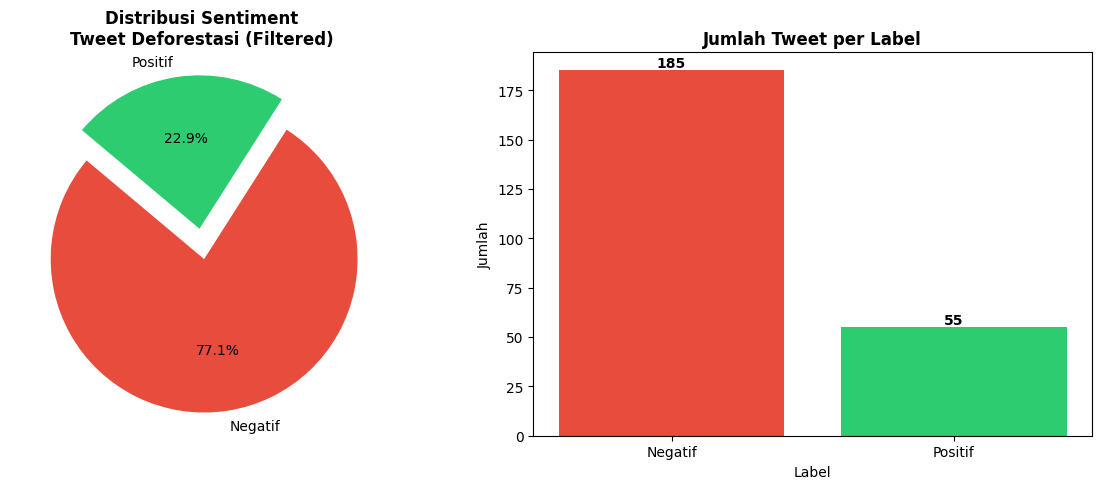

In [ ]:
import matplotlib.pyplot as plt

# Mengambil data terbaru dari df yang sudah difilter
label_counts = df['label'].value_counts()
n_labels = len(label_counts)

colors_dict = {'Negatif': '#e74c3c', 'Netral': '#3498db', 'Positif': '#2ecc71'}
color_list = [colors_dict[label] for label in label_counts.index]
explode_tuple = tuple([0.1] * n_labels)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Pie chart
axes[0].pie(label_counts,
            labels=label_counts.index,
            autopct='%1.1f%%',
            startangle=140,
            colors=color_list,
            explode=explode_tuple)
axes[0].set_title('Distribusi Sentiment\nTweet Deforestasi (Filtered)', fontweight='bold', fontsize=12)

# Bar chart
bars = axes[1].bar(label_counts.index,
                   label_counts.values,
                   color=color_list)
axes[1].set_title('Jumlah Tweet per Label', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Label')
axes[1].set_ylabel('Jumlah')

# Nilai di atas bar
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                 f'{int(height)}',
                 ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

Verifikasi Sample & WordCloud per Sentimen
Fungsi:
*   Menampilkan sample tweet per label
*   Membuat WordCloud terpisah untuk setiap kategori sentimen



In [ ]:

# VERIFIKASI SAMPLE PER LABEL

print("=== SAMPLE TWEET YANG DILABEL POSITIF ===\n")
samples_pos = df[df['label'] == 'Positif']['cleaned_text'].head(5).tolist()
for i, text in enumerate(samples_pos, 1):
    print(f"{i}. {text[:100]}...")

print("\n=== SAMPLE TWEET YANG DILABEL NEGATIF ===\n")
samples_neg = df[df['label'] == 'Negatif']['cleaned_text'].head(5).tolist()
for i, text in enumerate(samples_neg, 1):
    print(f"{i}. {text[:100]}...")


=== SAMPLE TWEET YANG DILABEL POSITIF ===

1. dekrit costa rica undangundang kehutanan no china program slcp grain for green dimulai oleh dewan ne...
2. pembayaran untuk jasa lingkungan pes adalah skema di mana penerima manfaat membayar penyedia layanan...
3. banyak solusi ditawarkan tapi deforestasi tetap terjadi mengapa...
4. pendapat prabowo itu menekankan manfaat ekonomi sawit sebagai penyerap karbon tapi deforestasi untuk...
5. lah bahas karbon kok jadi babat hutan laju deforestasi bisa ditekan indonesia malah net gain menurut...
6. berbeda dengan konoha yg marak deforestasi norwegia dalam abad ini berhasil menambah hutan nya hingg...
7. setuju prioritas utama adalah melindungi hutan sumatera dan area lain dari deforestasi ide penjagaan...
8. ya memang benar tapi kenapa dia bilang ini skrg maksud dia korelasi dengan apa mau mendukung defores...
9. komitmen tpl tak berhenti dari nol deforestasi ke pohon ditanam emisi turun siap audit bukti nyata p...
10. di tengah isu banjir sumatr

label
Negatif    185
Positif     55
Name: count, dtype: int64


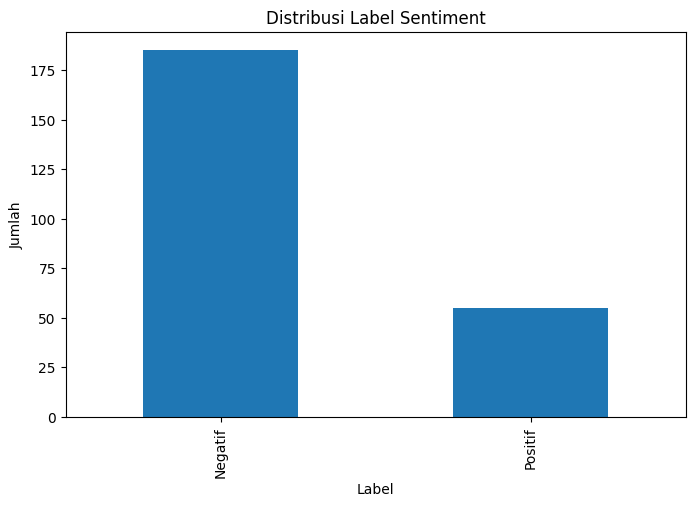

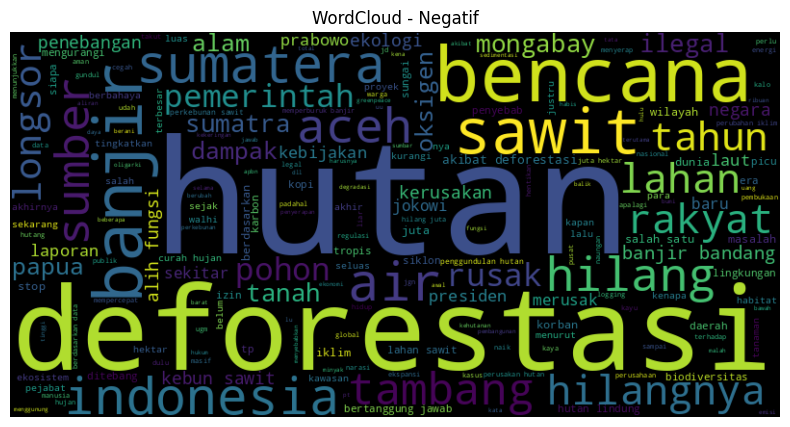

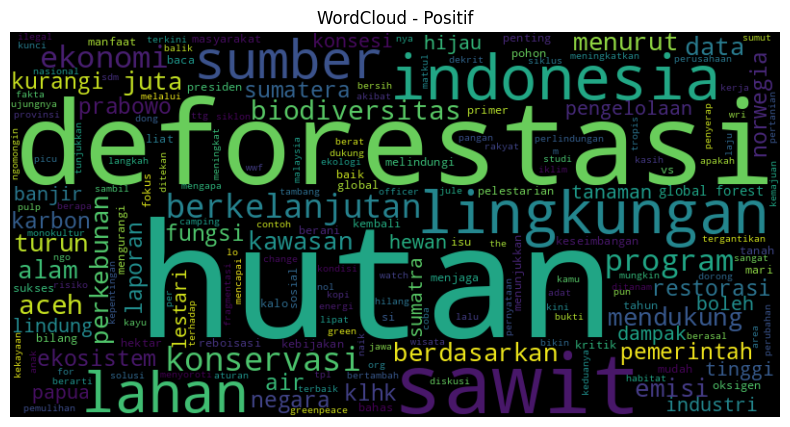

In [ ]:
# Cek distribusi label
print(df['label'].value_counts())

# Visualisasi distribusi
plt.figure(figsize=(8, 5))
df['label'].value_counts().plot(kind='bar')
plt.title('Distribusi Label Sentiment')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.show()

# WordCloud per sentiment
for label in df['label'].unique():
    text = ' '.join(df[df['label']==label]['cleaned_text'])
    wordcloud = WordCloud(stopwords=indo_stopwords, width=800, height=400).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'WordCloud - {label}')
    plt.axis('off')
    plt.show()

Membagi data menjadi:

Train: 70%

Validation: 15%

Test: 15%

In [ ]:
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['label'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['label'])

print(f"Train: {len(train_df)}, Validation: {len(val_df)}, Test: {len(test_df)}")

Train: 168, Validation: 36, Test: 36




*   Menampilkan distribusi label di setiap set (train/val/test)
*   Mengidentifikasi ketidakseimbangan kelas



Distribusi Label pada Data Training:
label
Negatif    129
Positif     39
Name: count, dtype: int64

Persentase:
label
Negatif    76.8
Positif    23.2
Name: proportion, dtype: float64


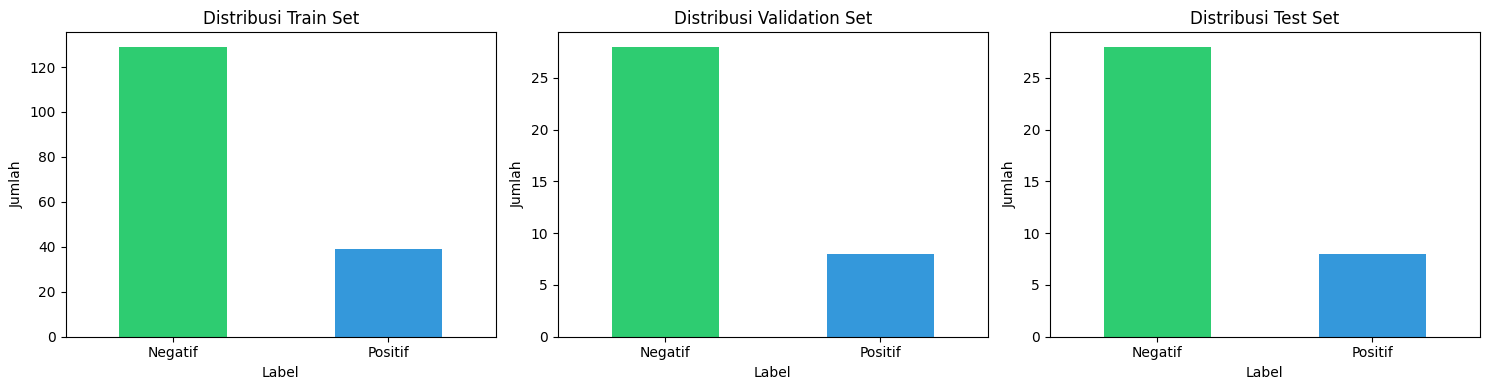

In [ ]:

# ANALISIS & HANDLING DATA IMBALANCE

print("Distribusi Label pada Data Training:")
print(train_df['label'].value_counts())
print(f"\nPersentase:")
print((train_df['label'].value_counts(normalize=True) * 100).round(1))

# Visualisasi distribusi
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, (name, data) in zip(axes, [('Train', train_df), ('Validation', val_df), ('Test', test_df)]):
    data['label'].value_counts().plot(kind='bar', ax=ax, color=['#2ecc71', '#3498db', '#e74c3c'])
    ax.set_title(f'Distribusi {name} Set')
    ax.set_xlabel('Label')
    ax.set_ylabel('Jumlah')
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


Model yang Diuji:


*   indolem/indobert-base-uncased - IndoLEM IndoBERT

*   indobenchmark/indobert-base-p1 - IndoBenchmark IndoBERT
*   cahya/roberta-base-indonesian-1.5G - Indonesian RoBERTa


Handling Imbalance:

Menggunakan compute_class_weight('balanced') untuk memberikan bobot lebih tinggi pada kelas minoritas.

In [ ]:
!pip install transformers datasets accelerate evaluate scikit-learn

from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import Dataset
import evaluate
import numpy as np

# Pilih model Indonesia (salah satu):
model_name = "indolem/indobert-base-uncased"
model_name = "indobenchmark/indobert-base-p1"
model_name = "cahya/roberta-base-indonesian-1.5G"

tokenizer = AutoTokenizer.from_pretrained(model_name)

# Mapping label ke angka
label2id = {'Negatif': 0, 'Positif': 1}
id2label = {0: 'Negatif', 1: 'Positif'}

model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=2,
    id2label=id2label,
    label2id=label2id
)
# HANDLING IMBALANCE DENGAN CLASS WEIGHTS

from sklearn.utils.class_weight import compute_class_weight
import torch
from torch import nn
import numpy as np

train_labels = [label2id[l] for l in train_df['label']]

existing_classes = np.unique(train_labels)

# Hitung bobot hanya untuk kelas yang tersedia
weights = compute_class_weight(
    class_weight='balanced',
    classes=existing_classes,
    y=train_labels
)

class_weights = torch.zeros(2, dtype=torch.float)
for i, cls_idx in enumerate(existing_classes):
    class_weights[cls_idx] = float(weights[i])

print("--- Hasil Perhitungan Class Weights ---")
for i, label in id2label.items():
    status = "Tersedia" if i in existing_classes else "KOSONG (Data hilang setelah filter)"
    print(f"  {label} ({i}): {class_weights[i]:.3f} - {status}")

# CUSTOM TRAINER

class WeightedTrainer(Trainer):
    def __init__(self, class_weights, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.class_weights = class_weights

    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits

        weight = self.class_weights.to(logits.device)
        loss_fn = nn.CrossEntropyLoss(weight=weight)
        loss = loss_fn(logits, labels)

        return (loss, outputs) if return_outputs else loss



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.9 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/556 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/504M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cahya/roberta-base-indonesian-1.5G and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


--- Hasil Perhitungan Class Weights ---
  Negatif (0): 0.651 - Tersedia
  Positif (1): 2.154 - Tersedia




*   Mengkonversi teks ke format yang dipahami model (token IDs)

*   Max length: 128 token
*   Padding: Menyamakan panjang semua sequence


*   Truncation: Memotong teks yang terlalu panjang



In [ ]:
def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True, max_length=128)

# Convert to HuggingFace Dataset
train_dataset = Dataset.from_pandas(train_df[['cleaned_text', 'label']].rename(columns={'cleaned_text': 'text'}))
val_dataset = Dataset.from_pandas(val_df[['cleaned_text', 'label']].rename(columns={'cleaned_text': 'text'}))
test_dataset = Dataset.from_pandas(test_df[['cleaned_text', 'label']].rename(columns={'cleaned_text': 'text'}))

# Encode labels
train_dataset = train_dataset.map(lambda x: {'label': label2id[x['label']]})
val_dataset = val_dataset.map(lambda x: {'label': label2id[x['label']]})
test_dataset = test_dataset.map(lambda x: {'label': label2id[x['label']]})

# Tokenize
train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/168 [00:00<?, ? examples/s]

Map:   0%|          | 0/36 [00:00<?, ? examples/s]

Map:   0%|          | 0/36 [00:00<?, ? examples/s]

Map:   0%|          | 0/168 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/504M [00:00<?, ?B/s]

Map:   0%|          | 0/36 [00:00<?, ? examples/s]

Map:   0%|          | 0/36 [00:00<?, ? examples/s]

Hyperparameter yang Diuji:

Learning Rate1e-5, 2e-5, 5e-5

Batch Size 8, 16

Epochs
3, 5
Total Kombinasi: 3 × 2 × 2 = 12 eksperimen

Output: Tabel hasil dengan val_accuracy dan val_loss untuk setiap kombinasi.

In [ ]:
import torch
import gc
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import Dataset
import evaluate

# Define metrics
metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

# Hyperparameter yang akan diuji
learning_rates = [1e-5, 2e-5, 5e-5]
batch_sizes = [8, 16]
epochs_list = [3, 5]

experiment_results = []
experiment_id = 1

# Loop untuk setiap kombinasi
for lr in learning_rates:
    for batch in batch_sizes:
        for epochs in epochs_list:

            print(f"\n{'='*60}")
            print(f"Eksperimen {experiment_id}: LR={lr}, Batch={batch}, Epochs={epochs}")
            print(f"{'='*60}")

            # Load ulang model untuk setiap eksperimen (PENTING!)
            model = AutoModelForSequenceClassification.from_pretrained(
                model_name,
                num_labels=2,
                id2label=id2label,
                label2id=label2id
            )

            training_args = TrainingArguments(
                output_dir=f"./results/exp_{experiment_id}",
                eval_strategy="epoch",
                save_strategy="epoch",
                learning_rate=lr,
                per_device_train_batch_size=batch,
                per_device_eval_batch_size=batch,
                num_train_epochs=epochs,
                weight_decay=0.01,
                load_best_model_at_end=True,
                metric_for_best_model="accuracy",
                report_to="none",
                save_total_limit=1,
            )

            # Trainer
            trainer = WeightedTrainer(
                class_weights=class_weights,
                model=model,
                args=training_args,
                train_dataset=train_dataset,
                eval_dataset=val_dataset,
                compute_metrics=compute_metrics,
            )

            # Train!
            train_result = trainer.train()

            # Evaluasi
            eval_result = trainer.evaluate()

            # Simpan hasil
            experiment_results.append({
                'experiment_id': experiment_id,
                'learning_rate': lr,
                'batch_size': batch,
                'epochs': epochs,
                'train_loss': train_result.training_loss,
                'val_accuracy': eval_result['eval_accuracy'],
                'val_loss': eval_result['eval_loss'],
            })

            print(f"✅ Val Accuracy: {eval_result['eval_accuracy']:.4f}")

            # Bersihkan memory
            del model, trainer
            import gc
            gc.collect()
            if torch.cuda.is_available():
                torch.cuda.empty_cache()

            experiment_id += 1

print("\n" + "="*60)
print("SEMUA EKSPERIMEN SELESAI!")
print("="*60)


Eksperimen 1: LR=1e-05, Batch=8, Epochs=3


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cahya/roberta-base-indonesian-1.5G and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.670291,0.777778
2,No log,0.636251,0.777778
3,No log,0.612326,0.722222


✅ Val Accuracy: 0.7778

Eksperimen 2: LR=1e-05, Batch=8, Epochs=5


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cahya/roberta-base-indonesian-1.5G and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.700508,0.777778
2,No log,0.659397,0.777778
3,No log,0.612746,0.777778
4,No log,0.558564,0.833333
5,No log,0.535478,0.861111


✅ Val Accuracy: 0.8611

Eksperimen 3: LR=1e-05, Batch=16, Epochs=3


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cahya/roberta-base-indonesian-1.5G and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.673492,0.777778
2,No log,0.648263,0.805556
3,No log,0.634795,0.805556


✅ Val Accuracy: 0.8056

Eksperimen 4: LR=1e-05, Batch=16, Epochs=5


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cahya/roberta-base-indonesian-1.5G and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.691150,0.750000
2,No log,0.683790,0.777778
3,No log,0.669161,0.750000
4,No log,0.656149,0.722222
5,No log,0.650224,0.777778


✅ Val Accuracy: 0.7778

Eksperimen 5: LR=2e-05, Batch=8, Epochs=3


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cahya/roberta-base-indonesian-1.5G and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.724763,0.777778
2,No log,0.504035,0.861111
3,No log,0.421455,0.861111


✅ Val Accuracy: 0.8611

Eksperimen 6: LR=2e-05, Batch=8, Epochs=5


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cahya/roberta-base-indonesian-1.5G and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.773121,0.777778
2,No log,0.603733,0.722222
3,No log,0.444684,0.805556
4,No log,0.496881,0.861111
5,No log,0.525017,0.888889


✅ Val Accuracy: 0.8889

Eksperimen 7: LR=2e-05, Batch=16, Epochs=3


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cahya/roberta-base-indonesian-1.5G and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.710108,0.777778
2,No log,0.574392,0.861111
3,No log,0.538769,0.833333


✅ Val Accuracy: 0.8611

Eksperimen 8: LR=2e-05, Batch=16, Epochs=5


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cahya/roberta-base-indonesian-1.5G and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.708577,0.777778
2,No log,0.662773,0.722222
3,No log,0.607111,0.722222
4,No log,0.545705,0.750000
5,No log,0.523420,0.750000


✅ Val Accuracy: 0.7778

Eksperimen 9: LR=5e-05, Batch=8, Epochs=3


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cahya/roberta-base-indonesian-1.5G and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.582427,0.722222
2,No log,0.698269,0.888889
3,No log,0.628647,0.861111


✅ Val Accuracy: 0.8889

Eksperimen 10: LR=5e-05, Batch=8, Epochs=5


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cahya/roberta-base-indonesian-1.5G and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.638113,0.694444
2,No log,0.532159,0.805556
3,No log,0.917693,0.805556
4,No log,1.047517,0.833333
5,No log,1.093840,0.861111


✅ Val Accuracy: 0.8611

Eksperimen 11: LR=5e-05, Batch=16, Epochs=3


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cahya/roberta-base-indonesian-1.5G and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.611959,0.833333
2,No log,0.641688,0.833333
3,No log,0.417261,0.861111


✅ Val Accuracy: 0.8611

Eksperimen 12: LR=5e-05, Batch=16, Epochs=5


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cahya/roberta-base-indonesian-1.5G and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.703989,0.777778
2,No log,0.668567,0.777778
3,No log,0.577756,0.583333
4,No log,0.790904,0.833333
5,No log,0.536082,0.861111


✅ Val Accuracy: 0.8611

SEMUA EKSPERIMEN SELESAI!




*  Menampilkan tabel ranking hasil eksperimen

*  Mengidentifikasi konfigurasi terbaik
*  Membuat visualisasi pengaruh masing-masing hyperparameter




=== HASIL HYPERPARAMETER TUNING ===



,experiment_id,learning_rate,batch_size,epochs,train_loss,val_accuracy,val_loss
8,9,0.00005,8,3,0.393996,0.888889,0.698269
5,6,0.00002,8,5,0.390462,0.888889,0.525017
1,2,0.00001,8,5,0.572543,0.861111,0.535478
6,7,0.00002,16,3,0.616837,0.861111,0.574392
10,11,0.00005,16,3,0.510774,0.861111,0.417261
9,10,0.00005,8,5,0.265542,0.861111,1.093840
11,12,0.00005,16,5,0.427375,0.861111,0.536082
4,5,0.00002,8,3,0.542598,0.861111,0.504035
2,3,0.00001,16,3,0.668675,0.805556,0.648263
0,1,0.00001,8,3,0.646803,0.777778,0.670291



🏆 BEST CONFIGURATION:
   Learning Rate: 5e-05
   Batch Size: 8.0
   Epochs: 3.0
   Val Accuracy: 0.8889


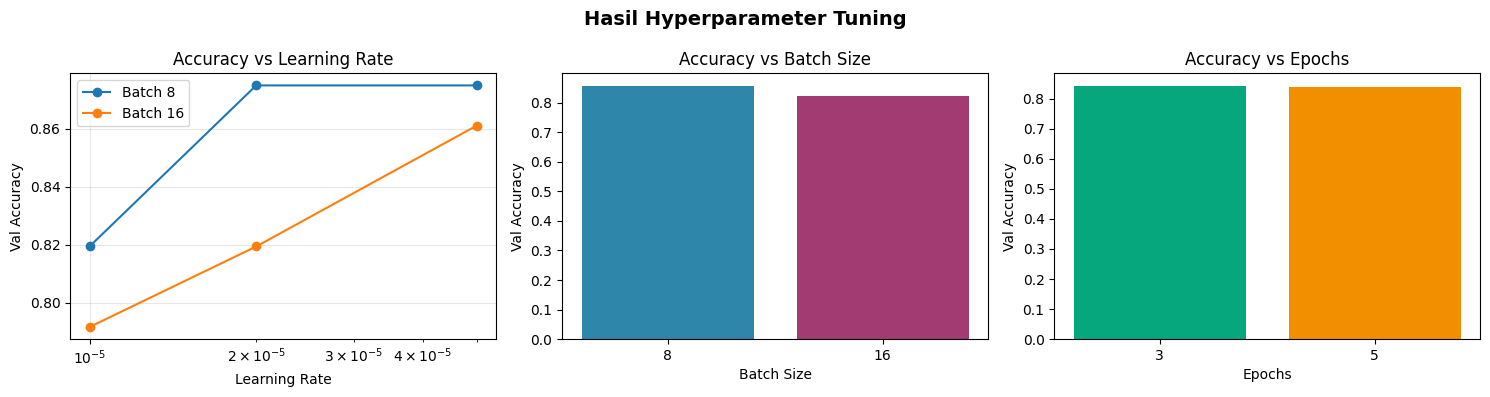

### Tabel Hasil Hyperparameter Tuning

| No | Learning Rate | Batch Size | Epochs | Val Accuracy | Val Loss |
|:--:|:-------------:|:----------:|:------:|:------------:|:--------:|
| 9.0 | 5e-05 | 8 | 3 | 0.8889 | 0.6983 |
| 6.0 | 2e-05 | 8 | 5 | 0.8889 | 0.5250 |
| 2.0 | 1e-05 | 8 | 5 | 0.8611 | 0.5355 |
| 7.0 | 2e-05 | 16 | 3 | 0.8611 | 0.5744 |
| 11.0 | 5e-05 | 16 | 3 | 0.8611 | 0.4173 |
| 10.0 | 5e-05 | 8 | 5 | 0.8611 | 1.0938 |
| 12.0 | 5e-05 | 16 | 5 | 0.8611 | 0.5361 |
| 5.0 | 2e-05 | 8 | 3 | 0.8611 | 0.5040 |
| 3.0 | 1e-05 | 16 | 3 | 0.8056 | 0.6483 |
| 1.0 | 1e-05 | 8 | 3 | 0.7778 | 0.6703 |
| 4.0 | 1e-05 | 16 | 5 | 0.7778 | 0.6838 |
| 8.0 | 2e-05 | 16 | 5 | 0.7778 | 0.7086 |


In [ ]:
# hasil semua eksperimen
import pandas as pd

results_df = pd.DataFrame(experiment_results)
results_df = results_df.sort_values('val_accuracy', ascending=False)

print("=== HASIL HYPERPARAMETER TUNING ===\n")
display(results_df)

# Best configuration
best = results_df.iloc[0]
print(f"\n🏆 BEST CONFIGURATION:")
print(f"   Learning Rate: {best['learning_rate']}")
print(f"   Batch Size: {best['batch_size']}")
print(f"   Epochs: {best['epochs']}")
print(f"   Val Accuracy: {best['val_accuracy']:.4f}")

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Hasil Hyperparameter Tuning', fontsize=14, fontweight='bold')

# 1. Accuracy by Learning Rate
ax1 = axes[0]
for batch in batch_sizes:
    data = results_df[results_df['batch_size'] == batch]
    data_grouped = data.groupby('learning_rate')['val_accuracy'].mean()
    ax1.plot(data_grouped.index, data_grouped.values, marker='o', label=f'Batch {batch}')
ax1.set_xlabel('Learning Rate')
ax1.set_ylabel('Val Accuracy')
ax1.set_xscale('log')
ax1.legend()
ax1.set_title('Accuracy vs Learning Rate')
ax1.grid(True, alpha=0.3)

# 2. Accuracy by Batch Size
ax2 = axes[1]
batch_acc = results_df.groupby('batch_size')['val_accuracy'].mean()
ax2.bar(batch_acc.index.astype(str), batch_acc.values, color=['#2E86AB', '#A23B72'])
ax2.set_xlabel('Batch Size')
ax2.set_ylabel('Val Accuracy')
ax2.set_title('Accuracy vs Batch Size')

# 3. Accuracy by Epochs
ax3 = axes[2]
epoch_acc = results_df.groupby('epochs')['val_accuracy'].mean()
ax3.bar(epoch_acc.index.astype(str), epoch_acc.values, color=['#06A77D', '#F18F01'])
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Val Accuracy')
ax3.set_title('Accuracy vs Epochs')

plt.tight_layout()
plt.savefig('hyperparameter_results.png', dpi=300, bbox_inches='tight')
plt.show()

# Generate tabel markdown untuk README
print("### Tabel Hasil Hyperparameter Tuning\n")
print("| No | Learning Rate | Batch Size | Epochs | Val Accuracy | Val Loss |")
print("|:--:|:-------------:|:----------:|:------:|:------------:|:--------:|")
for _, row in results_df.iterrows():
    print(f"| {row['experiment_id']} | {row['learning_rate']} | {int(row['batch_size'])} | "
          f"{int(row['epochs'])} | {row['val_accuracy']:.4f} | {row['val_loss']:.4f} |")

Membandingkan performa 3 model pre-trained dengan hyperparameter optimal yang sama.

Model yang Dibandingkan:


*   IndoLEM-IndoBERT: Model BERT yang di-pretrain khusus pada korpus Indonesia

*   IndoBenchmark-IndoBERT: Varian IndoBERT dari IndoBenchmark
*   mBERT-Multilingual: BERT multilingual (baseline)




In [ ]:

# EKSPERIMEN: PERBANDINGAN MODEL

import torch
import gc
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments
from datasets import Dataset
import pandas as pd

# Ambil best hyperparameter dari eksperimen sebelumnya
best = results_df.iloc[0]
BEST_LR = best['learning_rate']
BEST_BATCH = int(best['batch_size'])
BEST_EPOCHS = int(best['epochs'])

print("="*60)
print("EKSPERIMEN PERBANDINGAN MODEL")
print(f"Menggunakan: LR={BEST_LR}, Batch={BEST_BATCH}, Epochs={BEST_EPOCHS}")
print("="*60)

# Daftar model yang akan dibandingkan
MODELS = [
    {
        'name': 'IndoLEM-IndoBERT',
        'model_id': 'indolem/indobert-base-uncased'
    },
    {
        'name': 'IndoBenchmark-IndoBERT',
        'model_id': 'indobenchmark/indobert-base-p1'
    },
    {
        'name': 'mBERT-Multilingual',
        'model_id': 'bert-base-multilingual-uncased'
    }
]

# Simpan hasil
model_results = []

for model_info in MODELS:
    print(f"\n{'='*60}")
    print(f"Training: {model_info['name']}")
    print(f"{'='*60}")

    # Cleanup memory sebelum load model baru
    gc.collect()
    torch.cuda.empty_cache()

    tokenizer = AutoTokenizer.from_pretrained(model_info['model_id'])

    train_ds = Dataset.from_pandas(
        train_df[['cleaned_text', 'label']].rename(columns={'cleaned_text': 'text'}).reset_index(drop=True)
    )
    val_ds = Dataset.from_pandas(
        val_df[['cleaned_text', 'label']].rename(columns={'cleaned_text': 'text'}).reset_index(drop=True)
    )

    def tokenize_function(examples):
        return tokenizer(
            examples['text'],
            padding='max_length',
            truncation=True,
            max_length=128
        )

    train_ds = train_ds.map(lambda x: {'label': label2id[x['label']]})
    val_ds = val_ds.map(lambda x: {'label': label2id[x['label']]})

    train_ds = train_ds.map(tokenize_function, batched=True, remove_columns=['text'])
    val_ds = val_ds.map(tokenize_function, batched=True, remove_columns=['text'])

    train_ds.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
    val_ds.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

    model = AutoModelForSequenceClassification.from_pretrained(
        model_info['model_id'],
        num_labels=2,
        id2label=id2label,
        label2id=label2id
    )

    # Training arguments
    training_args = TrainingArguments(
        output_dir=f"./results/{model_info['name'].replace(' ', '_')}",
        eval_strategy="epoch",
        save_strategy="epoch",
        learning_rate=BEST_LR,
        per_device_train_batch_size=BEST_BATCH,
        per_device_eval_batch_size=BEST_BATCH,
        num_train_epochs=BEST_EPOCHS,
        weight_decay=0.01,
        load_best_model_at_end=True,
        metric_for_best_model="accuracy",
        report_to="none",
        save_total_limit=1,
    )

    # Trainer dengan dataset yang sudah di-tokenize
    trainer = WeightedTrainer(
        class_weights=class_weights,
        model=model,
        args=training_args,
        train_dataset=train_ds,
        eval_dataset=val_ds,
        compute_metrics=compute_metrics,
    )

    # Train
    train_result = trainer.train()
    eval_result = trainer.evaluate()

    # Simpan hasil
    model_results.append({
        'model_name': model_info['name'],
        'model_id': model_info['model_id'],
        'val_accuracy': eval_result['eval_accuracy'],
        'val_loss': eval_result['eval_loss'],
        'train_loss': train_result.training_loss,
    })

    print(f"✅ {model_info['name']} - Val Accuracy: {eval_result['eval_accuracy']:.4f}")

    # Cleanup setelah selesai
    del model, trainer, tokenizer, train_ds, val_ds
    gc.collect()
    torch.cuda.empty_cache()

print("\n" + "="*60)
print("PERBANDINGAN MODEL SELESAI!")
print("="*60)

model_results_df = pd.DataFrame(model_results).sort_values('val_accuracy', ascending=False)
display(model_results_df)

EKSPERIMEN PERBANDINGAN MODEL
Menggunakan: LR=5e-05, Batch=8, Epochs=3

Training: IndoLEM-IndoBERT


Map:   0%|          | 0/168 [00:00<?, ? examples/s]

Map:   0%|          | 0/36 [00:00<?, ? examples/s]

Map:   0%|          | 0/168 [00:00<?, ? examples/s]

Map:   0%|          | 0/36 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.790125,0.777778
2,No log,0.898897,0.750000
3,No log,0.907451,0.694444


✅ IndoLEM-IndoBERT - Val Accuracy: 0.7778

Training: IndoBenchmark-IndoBERT


Map:   0%|          | 0/168 [00:00<?, ? examples/s]

Map:   0%|          | 0/36 [00:00<?, ? examples/s]

Map:   0%|          | 0/168 [00:00<?, ? examples/s]

Map:   0%|          | 0/36 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.576561,0.666667
2,No log,0.543887,0.805556
3,No log,0.793975,0.861111


✅ IndoBenchmark-IndoBERT - Val Accuracy: 0.8611

Training: mBERT-Multilingual


Map:   0%|          | 0/168 [00:00<?, ? examples/s]

Map:   0%|          | 0/36 [00:00<?, ? examples/s]

Map:   0%|          | 0/168 [00:00<?, ? examples/s]

Map:   0%|          | 0/36 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.716603,0.777778
2,No log,0.680751,0.777778
3,No log,0.677222,0.805556


✅ mBERT-Multilingual - Val Accuracy: 0.8056

PERBANDINGAN MODEL SELESAI!


,model_name,model_id,val_accuracy,val_loss,train_loss
1,IndoBenchmark-IndoBERT,indobenchmark/indobert-base-p1,0.861111,0.793975,0.316596
2,mBERT-Multilingual,bert-base-multilingual-uncased,0.805556,0.677222,0.699887
0,IndoLEM-IndoBERT,indolem/indobert-base-uncased,0.777778,0.790125,0.664969




*   Membuat bar chart perbandingan accuracy dan loss
*   Mengidentifikasi model terbaik



=== HASIL PERBANDINGAN MODEL ===



,model_name,model_id,val_accuracy,val_loss,train_loss
1,IndoBenchmark-IndoBERT,indobenchmark/indobert-base-p1,0.861111,0.793975,0.316596
2,mBERT-Multilingual,bert-base-multilingual-uncased,0.805556,0.677222,0.699887
0,IndoLEM-IndoBERT,indolem/indobert-base-uncased,0.777778,0.790125,0.664969



🏆 BEST MODEL: IndoBenchmark-IndoBERT
   Val Accuracy: 0.8611
   Val Loss: 0.7940


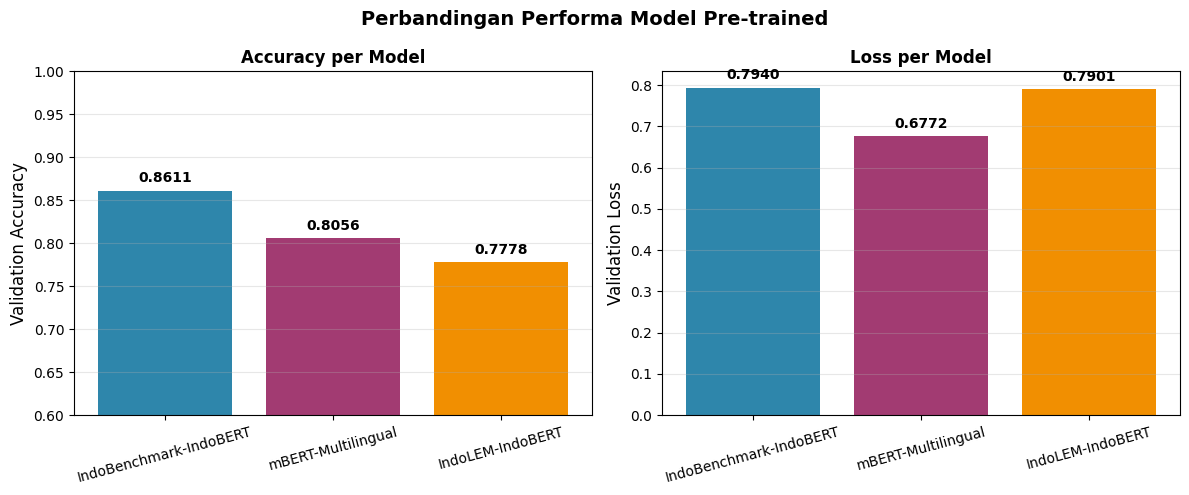

### Tabel Perbandingan Model

| Model | Val Accuracy | Val Loss |
|:------|:------------:|:--------:|
| IndoBenchmark-IndoBERT | 0.8611 | 0.7940 |
| mBERT-Multilingual | 0.8056 | 0.6772 |
| IndoLEM-IndoBERT | 0.7778 | 0.7901 |


In [ ]:
# Hasil perbandingan model
model_results_df = pd.DataFrame(model_results)
model_results_df = model_results_df.sort_values('val_accuracy', ascending=False)

print("=== HASIL PERBANDINGAN MODEL ===\n")
display(model_results_df)

# Best model
best_model = model_results_df.iloc[0]
print(f"\n🏆 BEST MODEL: {best_model['model_name']}")
print(f"   Val Accuracy: {best_model['val_accuracy']:.4f}")
print(f"   Val Loss: {best_model['val_loss']:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Perbandingan Performa Model Pre-trained', fontsize=14, fontweight='bold')

colors = ['#2E86AB', '#A23B72', '#F18F01']

# 1. Accuracy
ax1 = axes[0]
bars1 = ax1.bar(model_results_df['model_name'], model_results_df['val_accuracy'], color=colors)
ax1.set_ylabel('Validation Accuracy', fontsize=12)
ax1.set_title('Accuracy per Model', fontweight='bold')
ax1.set_ylim([0.6, 1.0])
for bar, val in zip(bars1, model_results_df['val_accuracy']):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{val:.4f}', ha='center', fontweight='bold')
ax1.tick_params(axis='x', rotation=15)
ax1.grid(True, alpha=0.3, axis='y')

# 2. Loss
ax2 = axes[1]
bars2 = ax2.bar(model_results_df['model_name'], model_results_df['val_loss'], color=colors)
ax2.set_ylabel('Validation Loss', fontsize=12)
ax2.set_title('Loss per Model', fontweight='bold')
for bar, val in zip(bars2, model_results_df['val_loss']):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'{val:.4f}', ha='center', fontweight='bold')
ax2.tick_params(axis='x', rotation=15)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Tabel perbandingan model
print("### Tabel Perbandingan Model\n")
print("| Model | Val Accuracy | Val Loss |")
print("|:------|:------------:|:--------:|")
for _, row in model_results_df.iterrows():
    print(f"| {row['model_name']} | {row['val_accuracy']:.4f} | {row['val_loss']:.4f} |")



1.   Training model final dengan konfigurasi optimal

2.   Evaluasi pada test set (data yang belum pernah dilihat model)
3.   Menghitung metrik evaluasi:

*   Accuracy: Persentase prediksi benar

*   Confusion Matrix: Visualisasi true positive, false positive, dll.
*   Classification Report: Precision, Recall, F1-score per kelas







KONFIGURASI TRAINING FINAL
Model: indobenchmark/indobert-base-p1
Learning Rate: 5e-05
Batch Size: 8
Epochs: 3


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/168 [00:00<?, ? examples/s]

Map:   0%|          | 0/36 [00:00<?, ? examples/s]

Map:   0%|          | 0/36 [00:00<?, ? examples/s]

Map:   0%|          | 0/168 [00:00<?, ? examples/s]

Map:   0%|          | 0/36 [00:00<?, ? examples/s]

Map:   0%|          | 0/36 [00:00<?, ? examples/s]


Dataset ready:
  Train: 168
  Val: 36
  Test: 36

Class Weights Final:
  Negatif (0): 0.651 - Tersedia
  Positif (1): 2.154 - Tersedia

MULAI TRAINING...


Epoch,Training Loss,Validation Loss,Accuracy
1,0.632700,0.576562,0.666667
2,0.225900,0.543887,0.805556
3,0.011700,0.794004,0.861111



EVALUASI PADA TEST SET



🎯 Test Accuracy: 0.9167


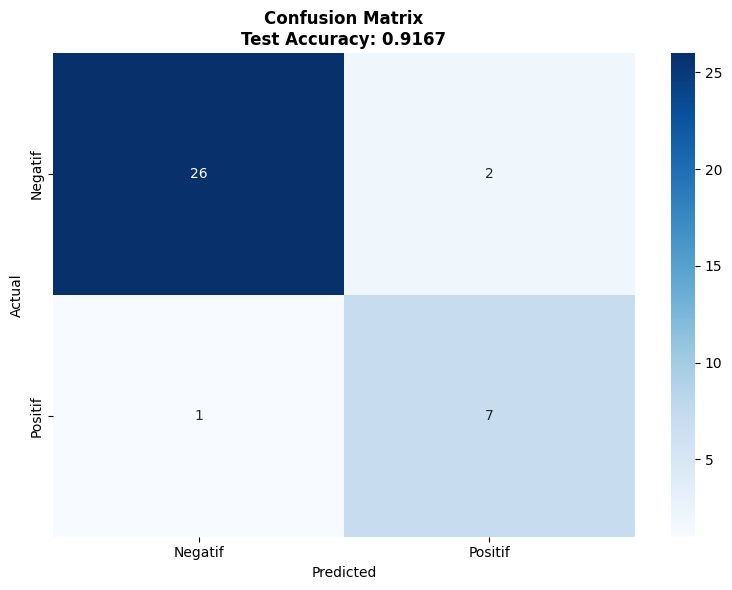


📊 Classification Report:
              precision    recall  f1-score   support

     Negatif       0.96      0.93      0.95        28
     Positif       0.78      0.88      0.82         8

    accuracy                           0.92        36
   macro avg       0.87      0.90      0.88        36
weighted avg       0.92      0.92      0.92        36


✅ TRAINING & EVALUASI SELESAI!


In [ ]:

# CELL: TRAINING FINAL + EVALUASI

import numpy as np
import torch
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import Dataset
import evaluate
from torch import nn

# 1. SETUP MODEL & HYPERPARAMETER

best_model_id = "indobenchmark/indobert-base-p1"

# Ambil otomatis dari hasil eksperimen sebelumnya
best = results_df.iloc[0]
BEST_LR = best['learning_rate']
BEST_BATCH = int(best['batch_size'])
BEST_EPOCHS = int(best['epochs'])

print("=" * 60)
print("KONFIGURASI TRAINING FINAL")
print("=" * 60)
print(f"Model: {best_model_id}")
print(f"Learning Rate: {BEST_LR}")
print(f"Batch Size: {BEST_BATCH}")
print(f"Epochs: {BEST_EPOCHS}")

# Mapping label
label2id = {'Negatif': 0, 'Positif': 1}
id2label = {0: 'Negatif', 1: 'Positif'}

# ✅ Load tokenizer SEBELUM digunakan
tokenizer = AutoTokenizer.from_pretrained(best_model_id)

# Load model
model = AutoModelForSequenceClassification.from_pretrained(
    best_model_id,
    num_labels=2,
    id2label=id2label,
    label2id=label2id
)

# 2. PREPARE DATASET

def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True, max_length=128)

# Convert to HuggingFace Dataset
train_dataset = Dataset.from_pandas(train_df[['cleaned_text', 'label']].rename(columns={'cleaned_text': 'text'}).reset_index(drop=True))
val_dataset = Dataset.from_pandas(val_df[['cleaned_text', 'label']].rename(columns={'cleaned_text': 'text'}).reset_index(drop=True))
test_dataset = Dataset.from_pandas(test_df[['cleaned_text', 'label']].rename(columns={'cleaned_text': 'text'}).reset_index(drop=True))

# Encode labels
train_dataset = train_dataset.map(lambda x: {'label': label2id[x['label']]})
val_dataset = val_dataset.map(lambda x: {'label': label2id[x['label']]})
test_dataset = test_dataset.map(lambda x: {'label': label2id[x['label']]})

# Tokenize
train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

print(f"\nDataset ready:")
print(f"  Train: {len(train_dataset)}")
print(f"  Val: {len(val_dataset)}")
print(f"  Test: {len(test_dataset)}")

# 3. CLASS WEIGHTS (HANDLING IMBALANCE)

train_labels = train_dataset['label']
existing_classes = np.unique(train_labels)

weights = compute_class_weight(
    class_weight='balanced',
    classes=existing_classes,
    y=train_labels
)

class_weights = torch.zeros(2, dtype=torch.float)
for i, cls_idx in enumerate(existing_classes):
    class_weights[cls_idx] = float(weights[i])

print(f"\nClass Weights Final:")
for i, label in id2label.items():
    status = "Tersedia" if i in existing_classes else "KOSONG"
    print(f"  {label} ({i}): {class_weights[i]:.3f} - {status}")

# 4. CUSTOM TRAINER DENGAN WEIGHTED LOSS

class WeightedTrainer(Trainer):
    def __init__(self, class_weights, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.class_weights = class_weights

    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits

        weight = self.class_weights.to(logits.device)
        loss_fn = nn.CrossEntropyLoss(weight=weight)
        loss = loss_fn(logits, labels)

        return (loss, outputs) if return_outputs else loss

# 5. TRAINING

metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

training_args = TrainingArguments(
    output_dir="./results_final",
    num_train_epochs=BEST_EPOCHS,
    per_device_train_batch_size=BEST_BATCH,
    per_device_eval_batch_size=BEST_BATCH,
    learning_rate=BEST_LR,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    logging_steps=10,
    report_to="none"
)

trainer = WeightedTrainer(
    class_weights=class_weights,
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

print("\n" + "=" * 60)
print("MULAI TRAINING...")
print("=" * 60)

trainer.train()

# 6. EVALUASI PADA TEST SET

print("\n" + "=" * 60)
print("EVALUASI PADA TEST SET")
print("=" * 60)

predictions = trainer.predict(test_dataset)
pred_labels = np.argmax(predictions.predictions, axis=-1)
true_labels = test_dataset['label']

# Test Accuracy
test_accuracy = accuracy_score(true_labels, pred_labels)
print(f"\n🎯 Test Accuracy: {test_accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negatif', 'Positif'],
            yticklabels=['Negatif', 'Positif'])
plt.title(f'Confusion Matrix\nTest Accuracy: {test_accuracy:.4f}', fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=150)
plt.show()

# ✅ Classification Report - DIPERBAIKI (hanya 2 kelas)
print("\n📊 Classification Report:")
print("=" * 60)
print(classification_report(true_labels, pred_labels,
                            labels=[0, 1],
                            target_names=['Negatif', 'Positif']))

print("\n✅ TRAINING & EVALUASI SELESAI!")